In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [2]:
# Read in CSV File
document_check = 'document_check_sample.csv'
facial_report = 'facial_report_sample.csv'

document_df = pd.read_csv(document_check)
facial_df = pd.read_csv(facial_report)


## Understand the attributes of data frames: 
- What are the attributes 
- What are their unique values 

In [3]:
# Understand the attributes
document_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5880 non-null   float64
 1   user_id                             5880 non-null   object 
 2   result                              5880 non-null   object 
 3   visual_authenticity_result          4991 non-null   object 
 4   image_integrity_result              5880 non-null   object 
 5   face_detection_result               4990 non-null   object 
 6   image_quality_result                5880 non-null   object 
 7   created_at                          5880 non-null   object 
 8   supported_document_result           5869 non-null   object 
 9   conclusive_document_quality_result  3140 non-null   object 
 10  colour_picture_result               3140 non-null   object 
 11  data_validation_result              4739 

In [4]:
# Understand the attributes
facial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5880 non-null   float64
 1   user_id                        5880 non-null   object 
 2   result                         5880 non-null   object 
 3   face_comparison_result         5535 non-null   object 
 4   created_at                     5880 non-null   object 
 5   facial_image_integrity_result  5861 non-null   object 
 6   visual_authenticity_result     4991 non-null   object 
 7   properties                     5880 non-null   object 
 8   attempt_id                     5880 non-null   object 
dtypes: float64(1), object(8)
memory usage: 827.0+ KB


## Dropping Nan vales 
- Based on the information above, there are 11760 entries, however there are only 5880 rows with result. Which means we canont make any assumption out of the rows with no result
- Hence, I will decide to drop all those rows

In [5]:
# Dropping the rows with Na values for result
document_df = document_df.dropna(subset=['result']).reset_index(drop=True)
facial_df = facial_df.dropna(subset=['result']).reset_index(drop=True)



## Handling document file

In [6]:
# Remmove unrelevant attributes

document_importantAttr = [
 'result', 
 'visual_authenticity_result',
 'image_integrity_result',
 'face_detection_result',
 'image_quality_result',
 'created_at',
 'supported_document_result',
 'conclusive_document_quality_result',
 'colour_picture_result',
 'data_validation_result',
 'data_consistency_result',
 'data_comparison_result',
 'police_record_result',
 'compromised_document_result',]

In [7]:
# Currently, the date time is object so it will not be sorted correctly. We will convert that to date-time format

document_df['created_at'] = pd.to_datetime(document_df['created_at'], format='%d/%m/%Y %H:%M')
document_df['created_at'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 5880 entries, 0 to 5879
Series name: created_at
Non-Null Count  Dtype         
--------------  -----         
5880 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 46.1 KB


In [8]:
# Since the result recently decreased, sort the dataset by date 'created_at' 

document_filtered = document_df[document_importantAttr]
document_filtered = document_filtered.sort_values(by='created_at').reset_index(drop=True)

In [27]:
# Check the unique values in all attributes 

for attribute in document_importantAttr:
    unique_values = document_filtered[attribute].unique()
    # print(f"Unique values for {attribute}:\n{unique_values}\n")


In [54]:
# Create a pipeline to group by created date to see the trend 
def groupping(divided_doc, value):

    divided_doc[value] = divided_doc[value].fillna('null')

    result_counts = divided_doc.resample('M', on='created_at')[value].value_counts().unstack()

    result_counts.index = result_counts.index.strftime('%Y-%m')

    return result_counts


In [59]:
# divide = ['created_at', 'colour_picture_result']
# divided_doc = document_filtered[divide]
# result_counts = groupping(divided_doc, 'colour_picture_result')

/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_75826/2994161520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divided_doc[value] = divided_doc[value].fillna('null')


In [61]:
#result_counts

colour_picture_result,clear,consider,null
created_at,,,
2017-05,NaN,NaN,58.0
2017-06,NaN,NaN,276.0
2017-07,NaN,NaN,1133.0
2017-08,580.0,2.0,646.0
2017-09,1033.0,NaN,220.0
2017-10,1525.0,NaN,407.0


In [67]:
def plotting(result_counts, value):

    result_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

    # Add labels and title
    plt.title(value + ' Trend Over Months')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='Visual Authenticity Result')

    # Show the plot
    plt.show()


/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_75826/2994161520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divided_doc[value] = divided_doc[value].fillna('null')


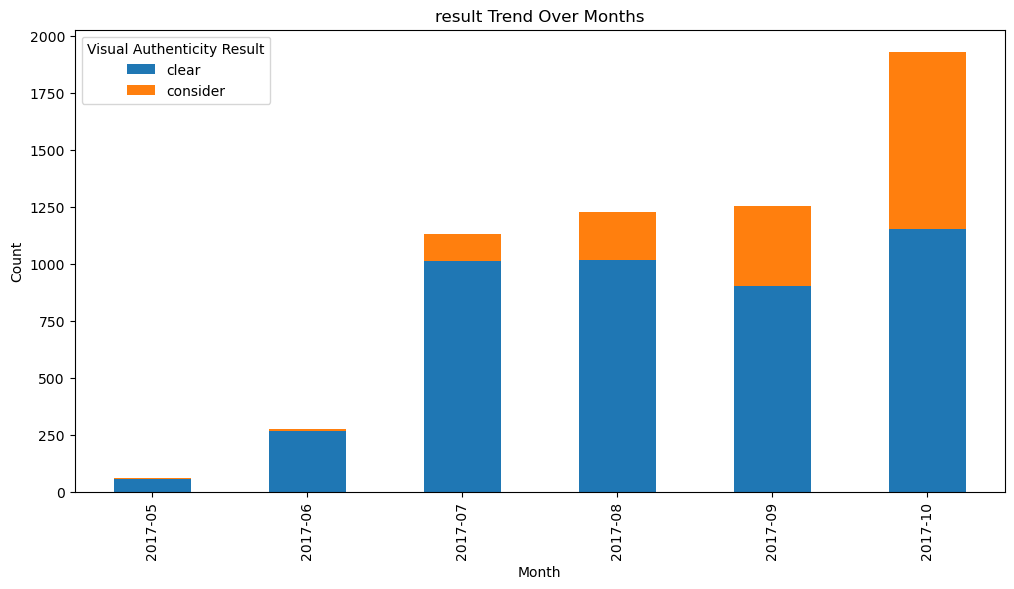

/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_75826/2994161520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divided_doc[value] = divided_doc[value].fillna('null')


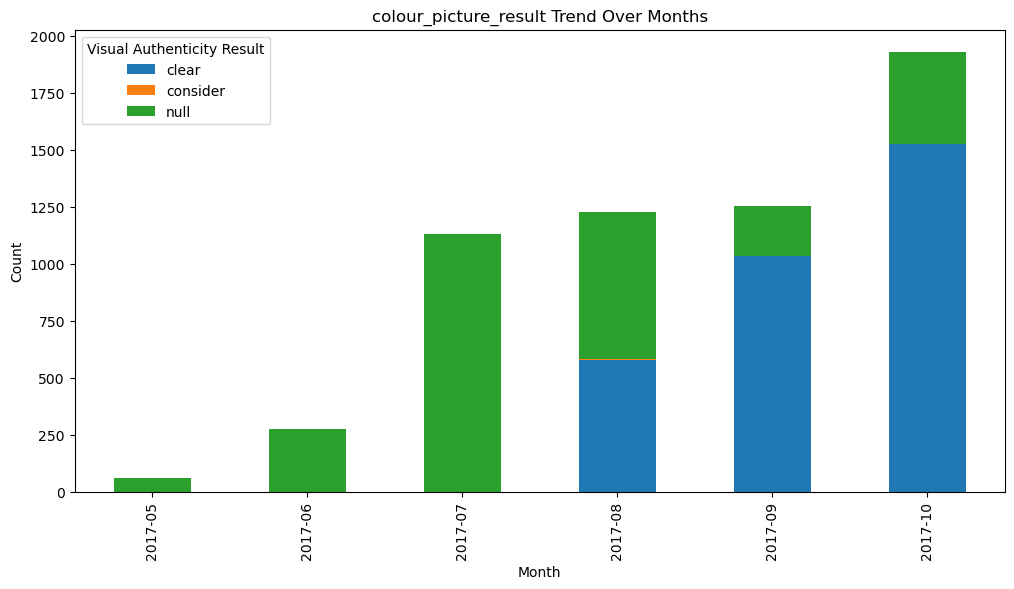

/var/folders/l9/lgcrjc856bb1g071byrjw6rr0000gn/T/ipykernel_75826/2994161520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divided_doc[value] = divided_doc[value].fillna('null')


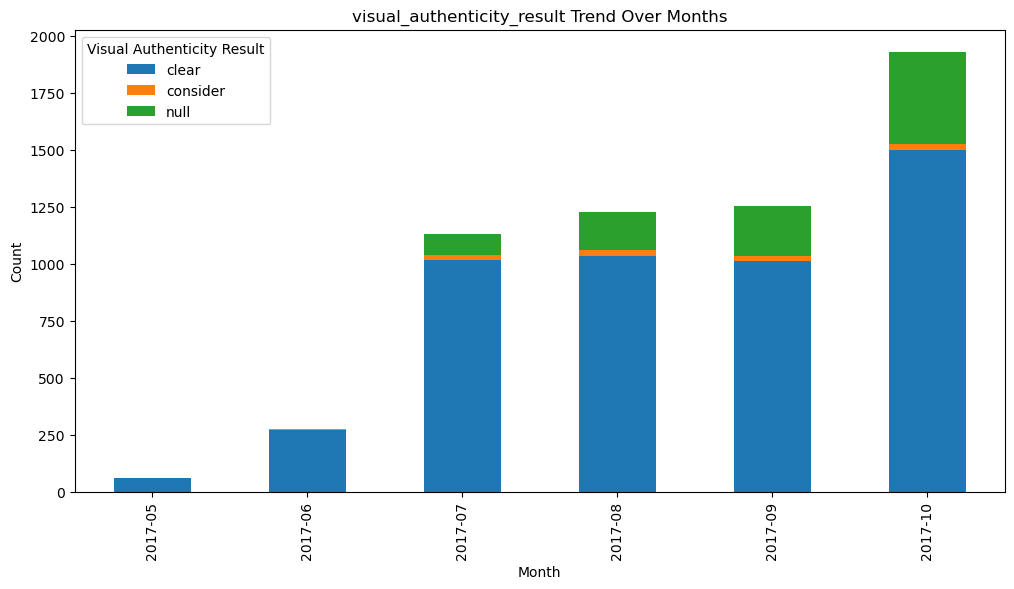

In [70]:
attr = ['result', 'colour_picture_result', 'visual_authenticity_result']

for value in attr:
    divide = ['created_at', value]
    divided_doc = document_filtered[divide]
    result_counts = groupping(divided_doc, value)
    plotting(result_counts, value)